Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0545 - val_loss: 0.0314
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0258 - val_loss: 0.0208
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0183 - val_loss: 0.0157
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0146 - val_loss: 0.0130
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0125 - val_loss: 0.0115
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0104 - val_loss: 0.0101

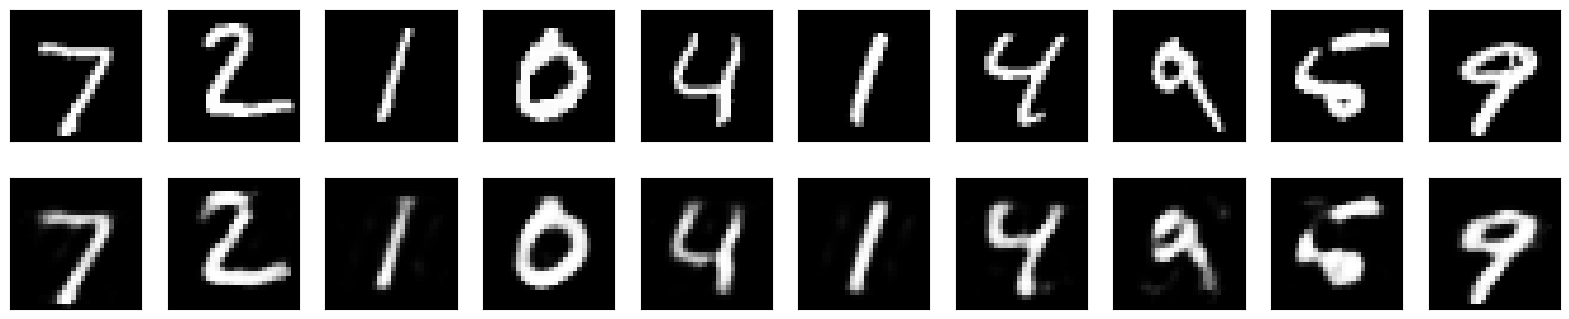

In [2]:
#Develop python code for reconstructing and regenerating inputs using any variant of Autoencoders 
#for application of your choice with appropriate benchmark datasets.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import mse

(train_images, _), (test_images, _) = mnist.load_data()

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

encoding_dim = 32

inputs = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(inputs)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputs, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(train_images, train_images, epochs=50, batch_size=128, validation_data=(test_images, test_images))

reconstructed_images = autoencoder.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
